Este colab fue desarrollado por Arnold Charry Armero.

# Diet Problem

Mi dieta requiere que todos los alimentos que consumo provengan de uno de los cuatro “grupos de alimentos básicos”
(tarta de chocolate, helado, refresco y tarta de queso). En la actualidad, los siguientes cuatro alimentos
están disponibles para el consumo: brownies, helado de chocolate, refrescos de cola y cheese cake de piña. Cada brownie cuesta 50¢, cada bola de helado de chocolate cuesta 20¢, cada botella
de cola cuesta 30¢ y cada trozo de tarta de queso con piña cuesta 80¢. Cada día debo ingerir al menos 500 calorías, 6 onzas de chocolate, 10 onzas de azúcar y 8 onzas de grasa. El contenido nutricional por unidad de cada alimento se muestra en la Tabla 2. Formule un modelo de programación lineal
que se puede utilizar para satisfacer mis necesidades nutricionales diarias a un costo mínimo.

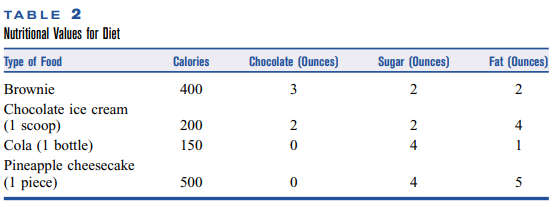

#Conjuntos

$ i = \text{Comida indexado por } i$

$ j = \text{Nutrientes indexado por } j$

## Parámetros

$ C_{i} = \textrm{Costo de comprar comida } i $

$ N_{ij} = \textrm{Cantidad de nutrientes } j \textrm{ a la comida } i$

$ D_{j} = \textrm{Demanda de nutrientes }j $

## Variables de decisión

$ x_{i} = \textrm{Cantidad de comida comprada i}$

## Función objetivo

$$ \textrm{Min } z = \sum_{i = 1}^{n} C_{i}\: x_{i} $$

## Restricciones

Se debe satisfacer la demanda $j$ de nutrientes,

$$ \sum_{i = 1}^{n}x_{i} N_{ij} \geq  D_{j}, \forall j$$

In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 23.5 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
comida = range(4)
nutrientes = range(4)

In [ ]:
#Parámetros
C = [50, 20, 30, 80]

N = [[400, 3, 2, 2], [200, 2, 2, 4], [150, 0, 4, 1], [500, 0, 4, 5]]

D = [500, 6, 10, 8]

In [ ]:
# Crear la instancia del modelo
model = LpProblem(name="Diet_Problem", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (comida), 0, None, LpContinuous)

# Agregar la función objetivo
model += lpSum([X[i] * C[i] for i in comida])

# Agregar las restricciones

#Se debe satisfacer la demanda
for j in nutrientes:
  model += lpSum(N[i][j] * X[i] for i in comida) >= D[j]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_0 = 0.0
X_1 = 3.0
X_2 = 1.0
X_3 = 0.0
Utilidades totales = $ 90.0
